In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("./data/model_metrics_weka.csv", sep=";")

In [39]:
df

,Modell,Accuracy,Kappa,Precision,Sensitivity,Specificity
0,Decision_Tree,0.9707,0.9410,0.9672,0.9689,0.9721
1,MLP_Classification,0.9182,0.8359,0.8928,0.9339,0.9049
2,SVM_Classification,0.8984,0.7956,0.8865,0.8928,0.9031
3,DeepMLP,0.9422,0.8834,0.9582,0.9147,0.9658
4,LSTM,0.9251,0.8490,0.9333,0.9019,0.9449


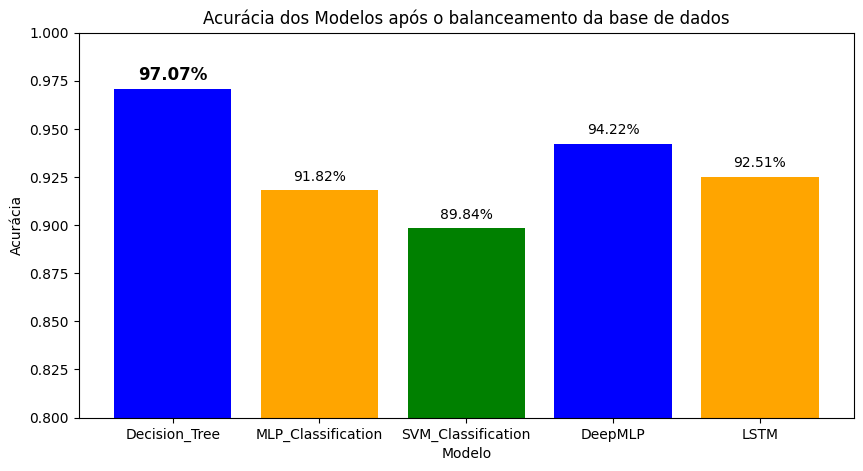

In [40]:
# Criar o gráfico de barras com uma figura maior
plt.figure(figsize=(10, 5))

plt.bar(df["Modell"], df["Accuracy"], color=['blue', 'orange', 'green'])
plt.ylim(0.8, 1.0)  # Definir o intervalo do eixo y para melhor visualização
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.title('Acurácia dos Modelos após o balanceamento da base de dados')

# Identificar o índice do modelo com a maior acurácia
index_max_accuracy = df["Accuracy"].idxmax()
# Adicionar os valores acima das barras em porcentagem

for i, acc in enumerate(df["Accuracy"]):
    if i == index_max_accuracy:
        plt.text(i, acc + 0.005, f'{acc*100:.2f}%', ha='center', weight='bold', fontsize=12)
    else:
        plt.text(i, acc + 0.005, f'{acc*100:.2f}%', ha='center')

# Aumentar o tamanho da janela
# plt.tight_layout()
plt.show()

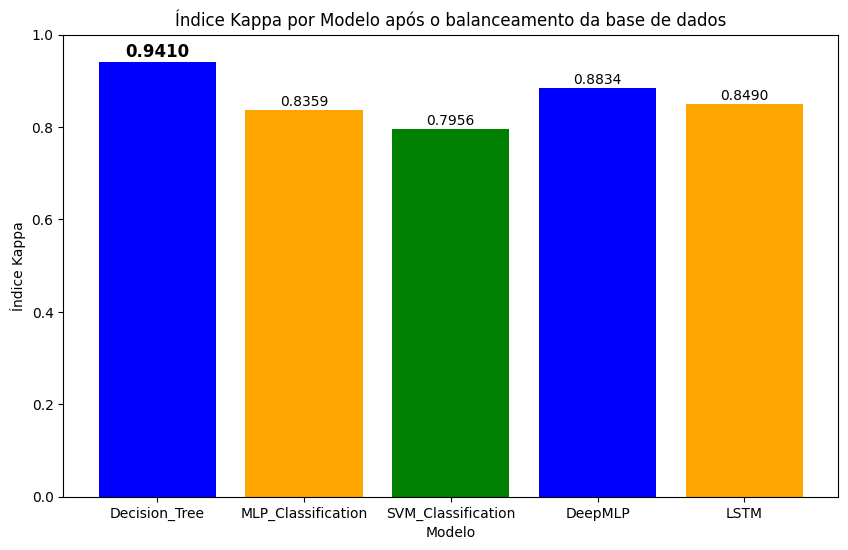

In [41]:
# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

index_max_kappa = df["Kappa"].idxmax()
# Barras apenas para o índice kappa
bar2 = ax.bar(df["Modell"], df["Kappa"], color=['blue', 'orange', 'green'], label='Kappa')
plt.ylim(0, 1.0)  # Definir o intervalo do eixo y para melhor visualização
# Adicionar rótulos e legendas
ax.set_xlabel('Modelo')
ax.set_ylabel('Índice Kappa')
ax.set_title('Índice Kappa por Modelo após o balanceamento da base de dados')

# Adicionar os valores acima das barras
for i, (bar, kappa) in enumerate(zip(bar2, df["Kappa"])):
    if i == index_max_kappa:
        plt.text(bar.get_x() + bar.get_width() / 2, kappa + 0.01, f'{kappa:.4f}', ha='center', weight='bold', fontsize=12)
    else:
        plt.text(bar.get_x() + bar.get_width() / 2, kappa + 0.01, f'{kappa:.4f}', ha='center')
        
# Exibir o gráfico
plt.show()

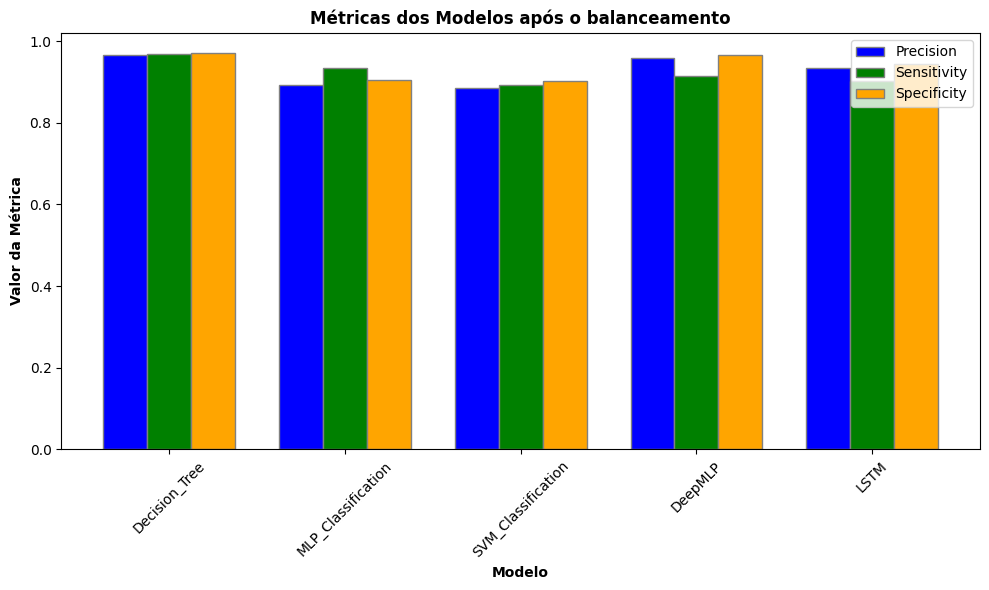

In [42]:

# Dados dos modelos
model_names = ['Decision_Tree', 'MLP_Classification', 'SVM_Classification', 'DeepMLP', 'LSTM']
precision = [0.9672, 0.8928, 0.8865, 0.9582, 0.9333]
sensitivity = [0.9689, 0.9339, 0.8928, 0.9147, 0.9019]
specificity = [0.9721, 0.9049, 0.9031, 0.9658, 0.9449]

# Largura da barra
bar_width = 0.25

# Definir posições das barras no eixo x
r1 = range(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]

# Plotar as barras
plt.figure(figsize=(10, 6))

plt.bar(r1, precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, sensitivity, color='g', width=bar_width, edgecolor='grey', label='Sensitivity')
plt.bar(r3, specificity, color='orange', width=bar_width, edgecolor='grey', label='Specificity')

# Adicionar rótulos, título e legenda
plt.xlabel('Modelo', fontweight='bold')
plt.ylabel('Valor da Métrica', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(model_names))], model_names, rotation=45)
plt.title('Métricas dos Modelos após o balanceamento', fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()